In [26]:
import autodiff
from autodiff.variable import Variable
#import 
import autodiff.function as F
import autodiff.optim as optim

# Part I-Basic Use


In [13]:
X = Variable([0,2,3])
print(X)

Value: [[0.]
 [2.]
 [3.]]
Gradient: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [22]:
#R->R
def my_func(X):
    x, y, z = X.unroll()
    return x + y * z

out = my_func(X)
print(out)

Value: 6.0
Gradient: [[1. 3. 2.]]


In [23]:
#R^3->R
def func(X):
    x, y, z = X.unroll()
    x1 = F.sin(F.exp(x))
    x2 = y + F.cosh(z)
    x3 = z + F.sinh(y)
    return x1 + x2 * x3

out = func(X)
print(out)


Value: 80.81218247990772
Gradient: [[ 0.54030231 52.02776637 78.45472072]]


In [24]:
#R^3->R^2
def func(X):
    x, y, z = X.unroll()
    x1 = F.sin(F.exp(x))
    x2 = y + F.cosh(z)
    x3 = z + F.sinh(y)
    x4 = F.Log(2)(x3)
    out_X = F.concat([x1, x4])
    return out_X

out = func(X)
print(out)

Value: [[0.84147098]
 [2.72832553]]
Gradient: [[0.54030231 0.         0.        ]
 [0.         0.81904563 0.21770415]]


# Part 109182- Optimizer

In [38]:
def my_loss_fn(X):
    x, y = X.unroll()
    return x*y

Minimized the function for 12 steps.


In [40]:
class GradientDescent(optim.Optimizer):
    def _step(self, loss):
        self.current_point -= self.lr * loss.grad.T

In [41]:
init_point = Variable([10, 1])
tol = 0.0001
gd = optim.GradientDescent(0.01, tol, my_loss_fn, init_point)
point, loss, trajectory = gd.minimize(1000)

Minimized the function for 12 steps.


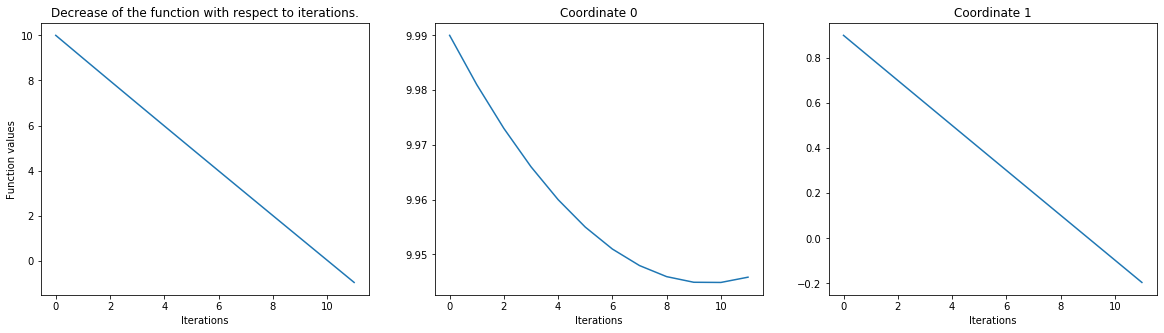

In [42]:
import matplotlib.pyplot as plt
gd.visualize(loss, trajectory)

In [43]:
from autodiff.variable import ReverseVariable as RVariable 

In [50]:
x = RVariable(1)
y = RVariable(2)

def my_func(x,y):
    return F.sqrt(y) + F.exp(x)
out = my_func(x,y)

In [51]:
out.reverse()
print(x.grad, y.grad)

2.718281828459045 0.35355339059327373
